In [1]:
import sys; sys.path.append('../../') 

from utils.data_cleaner import *
from data_collection_config import *
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

### –ß—Ç–µ–Ω–∏–µ –∏ –ø–æ–¥–≥–æ—Ç–æ–≤–∫–∞ –¥–∞–Ω–Ω—ã—Ö

In [2]:
Goods = pd.read_csv(f'{CLEAR_DIRECTORY}{CLEAR_GOODS_FILE}')
Other_characteristicks = pd.read_csv(f'{CLEAR_DIRECTORY}{CLEAR_OTHER_CHARACTERISTICKS_FILE}')
Feedbacks = pd.read_csv(f'{CLEAR_DIRECTORY}{CLEAR_FEEDBACKS_FILE}')

def prepare_goods(df):
    df['brand'] = df['brand'].fillna('Unknown')
    df['description'] = df['description'].fillna('')
    df['brand'] = df['brand'].str.lower().str.strip()

    # mask = df['name'].apply(is_relevant())
    # df = df[mask].copy()
    
    return df

def prepare_other_chars(df):
    df['name'] = df['name'].str.lower().str.strip()
    df['value'] = df['value'].str.lower().str.strip()
    
    df = df[df['value'].notna() & (df['value'] != '')]
    
    return df

def prepare_feedbacks(df):
    df['text'] = df['text'].fillna('')
    
    df['text'] = df['text'].str.lower().str.strip()
    
    return df

Goods = prepare_goods(Goods)
Goods = Goods[(Goods['price'] >= Goods['price'].quantile(0.01)) & (Goods['price'] <= Goods['price'].quantile(0.95))]
Other_characteristicks = prepare_other_chars(Other_characteristicks)
Feedbacks = prepare_feedbacks(Feedbacks)

# Goods.info()
# Other_characteristicks.info()
# Feedbacks.info()

## –í—ã–¥–µ–ª–µ–Ω–∏–µ –≥–ª–∞–≤–Ω—ã—Ö —Ö–∞—Ä–∞–∫—Ç–µ—Ä–∏—Å—Ç–∏–∫

In [3]:
print("–í—Å–µ–≥–æ —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö —Ö–∞—Ä–∞–∫—Ç–µ—Ä–∏—Å—Ç–∏–∫:", Other_characteristicks['name'].nunique())
print(Other_characteristicks['name'].value_counts().head(50))

–í—Å–µ–≥–æ —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö —Ö–∞—Ä–∞–∫—Ç–µ—Ä–∏—Å—Ç–∏–∫: 45
name
—Ç–∏–ø                                         68
–∞—Ä—Ç–∏–∫—É–ª                                     68
–∑–æ–Ω—ã –º–∞—Å—Å–∞–∂–∞                                61
–∫–æ–º–ø–ª–µ–∫—Ç–∞—Ü–∏—è                                59
—Ü–≤–µ—Ç                                        55
—Å—Ç—Ä–∞–Ω–∞-–∏–∑–≥–æ—Ç–æ–≤–∏—Ç–µ–ª—å                         50
–≤–∏–¥ –º–∞—Å—Å–∞–∂–∞                                 41
—É–ø–∞–∫–æ–≤–∫–∞                                    31
–æ—Å–æ–±–µ–Ω–Ω–æ—Å—Ç–∏ –º–∞—Å—Å–∞–∂–Ω–æ–≥–æ –∞–ø–ø–∞—Ä–∞—Ç–∞             27
–≤–∏–¥ –ø–∏—Ç–∞–Ω–∏—è                                 23
–≥–∞—Ä–∞–Ω—Ç–∏–π–Ω—ã–π —Å—Ä–æ–∫                            21
–º–∞—Ç–µ—Ä–∏–∞–ª –∫–æ—Ä–ø—É—Å–∞                            20
—Ñ–∞–∫—Ç–∏—á–µ—Å–∫–∏–π —Ä–∞–∑–º–µ—Ä —Ç–æ–≤–∞—Ä–∞, —Å–º               20
–∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–æ–≥—Ä–∞–º–º/—Ä–µ–∂–∏–º–æ–≤                 11
—Å—Ç—Ä–∞–Ω–∞ –ø—Ä–æ–∏–∑–≤–æ–¥—Å—Ç–≤–∞                         10
–≤—ã—Å–æ—Ç–∞ —É–ø

In [4]:
pivot_df = Other_characteristicks.pivot_table(
    index=['good_id', 'marketplace'],
    columns='name',
    values='value',
    aggfunc='first'
).reset_index()

pivot_df.columns.name = None

main_specs = pivot_df[['good_id', 'marketplace', '–∫–æ–º–ø–ª–µ–∫—Ç–∞—Ü–∏—è']]

main_specs['–∫–æ–º–ø–ª–µ–∫—Ç–∞—Ü–∏—è'] = main_specs['–∫–æ–º–ø–ª–µ–∫—Ç–∞—Ü–∏—è'].str.replace(r'\D', '', regex=True)

main_specs

/var/folders/x5/m9f65fq57_1642g0ls7c0zxw0000gn/T/ipykernel_2236/1215169110.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_specs['–∫–æ–º–ø–ª–µ–∫—Ç–∞—Ü–∏—è'] = main_specs['–∫–æ–º–ø–ª–µ–∫—Ç–∞—Ü–∏—è'].str.replace(r'\D', '', regex=True)


good_id marketplace –∫–æ–º–ø–ª–µ–∫—Ç–∞—Ü–∏—è
0     91044173          wb            1
1    162818043          wb            1
2    205925103          wb            1
3    205925986          wb            1
4    205929840          wb            2
..         ...         ...          ...
78  2634695095        ozon            2
79  2778913007        ozon            1
80  2779820474        ozon            1
81  2793997163        ozon             
82  2793999736        ozon             

[83 rows x 3 columns]

# –ê–Ω–∞–ª–∏–∑ —Ä—ã–Ω–∫–∞ –∫–∞–±–µ–ª–µ–π –¥–ª—è —ç–ª–µ–∫—Ç—Ä–æ–¥–æ–≤ –¥–ª—è —ç–ª–µ–∫—Ç—Ä–æ—Å—Ç–∏–º—É–ª—è—Ç–æ—Ä–æ–≤

## –í–≤–µ–¥–µ–Ω–∏–µ

–ù–µ–æ–±—Ö–æ–¥–∏–º–æ –ø–æ–Ω—è—Ç—å, –∫–∞–∫ –≤—ã–≥–ª—è–¥–∏—Ç —Ç–µ–∫—É—â–∞—è —Ä—ã–Ω–æ—á–Ω–∞—è —Å–∏—Ç—É–∞—Ü–∏—è –Ω–∞ —Ä—ã–Ω–∫–µ –∫–∞–±–µ–ª–µ–π –¥–ª—è —ç–ª–µ–∫—Ç—Ä–æ–¥–æ–≤ –¥–ª—è —ç–ª–µ–∫—Ç—Ä–æ—Å—Ç–∏–º—É–ª—è—Ç–æ—Ä–æ–≤. 

–ë—ã–ª–∏ —Å—Ñ–æ—Ä–º—É–ª–∏—Ä–æ–≤–∞–Ω—ã 4 —Ü–µ–ª–∏:
- –û–ø—Ä–µ–¥–µ–ª–∏—Ç—å, –≤ –∫–∞–∫–æ–º —Ü–µ–Ω–æ–≤–æ–º —Å–µ–≥–º–µ–Ω—Ç–µ –≤—ã–≥–æ–¥–Ω–µ–µ –≤—Å–µ–≥–æ –∫–æ–Ω–∫—É—Ä–∏—Ä–æ–≤–∞—Ç—å
- –ü–æ–Ω—è—Ç—å, –∫–∞–∫–∏–µ —Ñ—É–Ω–∫—Ü–∏–∏ –∏ —Ö–∞—Ä–∞–∫—Ç–µ—Ä–∏—Å—Ç–∏–∫–∏ –Ω–∞–∏–±–æ–ª–µ–µ –ø–æ–ø—É–ª—è—Ä–Ω—ã —É –ø–æ—Ç—Ä–µ–±–∏—Ç–µ–ª–µ–π
- –û—Ü–µ–Ω–∏—Ç—å —É—Ä–æ–≤–µ–Ω—å –∫–æ–Ω–∫—É—Ä–µ–Ω—Ü–∏–∏
- –í—ã—è–≤–∏—Ç—å –≤–æ–∑–º–æ–∂–Ω—ã–µ –Ω–∏—à–∏

## –û–ø–∏—Å–∞–Ω–∏–µ –∏—Å—Ç–æ—á–Ω–∏–∫–æ–≤ –∏ –ø–æ–¥—Ö–æ–¥–∞ –∫ —Å–±–æ—Ä—É –¥–∞–Ω–Ω—ã—Ö

–î–ª—è –¥–æ—Å—Ç–∏–∂–µ–Ω–∏—è –ø–æ—Å—Ç–∞–≤–ª–µ–Ω–Ω—ã—Ö —Ü–µ–ª–µ–π –≤ –ø–µ—Ä–≤—É—é –æ—á–µ—Ä–µ–¥—å –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ –ø–æ–¥–≥–æ—Ç–æ–≤–∏—Ç—å –Ω–∞–±–æ—Ä –¥–∞–Ω–Ω—ã—Ö. –î–∞–Ω–Ω—ã–µ —Å–æ–±—Ä–∞–Ω—ã —Å –¥–≤—É—Ö –º–∞—Ä–∫–µ—Ç–ø–ª–µ–π—Å–æ–≤: Wildberries –∏ Ozon.
–î–ª—è —ç—Ç–∏—Ö –º–∞—Ä–∫–µ—Ç–ø–ª–µ–π—Å–æ–≤ –±—ã–ª–∏ —Ä–∞–∑—Ä–∞–±–æ—Ç–∞–Ω—ã –ø–∞—Ä—Å–µ—Ä—ã —Å –ø–æ–º–æ—â—å—é Python + requests/Selenium. –ü–∞—Ä—Å–µ—Ä—ã –æ—Ä–≥–∞–Ω–∏–∑–æ–≤–∞–Ω—ã –≤ 2 –∫–ª–∞—Å—Å–∞: WB_Parser –∏ Ozon_Parser. –î–∞–Ω–Ω—ã–µ –∫–ª–∞—Å—Å—ã –∏–º–µ—é—Ç 3 –æ—Ç–∫—Ä—ã—Ç—ã—Ö –º–µ—Ç–æ–¥–∞: 
- get_products() - —Å–æ–±–∏—Ä–∞–µ—Ç –≤—Å–µ –∏–º–µ—é—â–∏–µ—Å—è —Ç–æ–≤–∞—Ä—ã –Ω–∞ –º–∞—Ä–∫–µ—Ç–ø–ª–µ–π—Å–µ, —Å–æ–æ—Ç–≤–µ—Ç—Å–≤—É—é—â–∏–µ –∑–∞–ø—Ä–æ—Å—É; 
- get_product_feedbacks() - —Å–æ–±–∏—Ä–∞–µ—Ç –æ—Ç–∑—ã–≤—ã –Ω–∞ –∑–∞–¥–∞–Ω–Ω—ã–π —Ç–æ–≤–∞—Ä;
- get_product_details() - —Å–æ–±–∏—Ä–∞–µ—Ç –æ–ø–∏—Å–∞–Ω–∏–µ –∏ —Ö–∞—Ä–∞–∫—Ç–µ—Ä–∏—Å—Ç–∏–∫–∏ –∑–∞–¥–∞–Ω–Ω–æ–≥–æ —Ç–æ–≤–∞—Ä–∞.

–° –æ–±–æ–∏—Ö –ø–ª–æ—â–∞–¥–æ–∫ –±—ã–ª–æ —Å–æ–±—Ä–∞–Ω–æ > 80 —Ç–æ–≤–∞—Ä–æ–≤.

–ü–æ—Å–ª–µ —Å–±–æ—Ä–∞, –¥–∞–Ω–Ω—ã–µ –±—ã–ª–∏ –æ—á–∏—â–µ–Ω—ã –∏ —Å–æ–±—Ä–∞–Ω—ã –≤ 3 —Ç–∞–±–ª–∏—Ü—ã:
- Goods (–æ—Å–Ω–æ–≤–Ω—ã–µ —Ö–∞—Ä–∞–∫—Ç–µ—Ä–∏—Å—Ç–∏–∫–∏ —Ç–æ–≤–∞—Ä–æ–≤)
- Feedbacks (–æ—Ç–∑—ã–≤—ã –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π)
- Other_characteristics (–¥–æ–ø. —Ö–∞—Ä–∞–∫—Ç–µ—Ä–∏—Å—Ç–∏–∫–∏)

–í –∏—Ç–æ–≥–µ –ø–æ–ª—É—á–∏–ª–æ—Å—å 81 —Ç–æ–≤–∞—Ä –∏ >4 938 –æ—Ç–∑—ã–≤–æ–≤ –æ –Ω–∏—Ö

–°–æ—Å—Ç–∞–≤ —Ç–∞–±–ª–∏—Ü:

In [5]:
Goods.info()
Other_characteristicks.info()
Feedbacks.info()

<class 'pandas.core.frame.DataFrame'>
Index: 81 entries, 0 to 86
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           81 non-null     int64  
 1   marketplace  81 non-null     object 
 2   name         81 non-null     object 
 3   price        81 non-null     int64  
 4   rating       81 non-null     float64
 5   feedbacks    81 non-null     int64  
 6   brand        81 non-null     object 
 7   description  81 non-null     object 
dtypes: float64(1), int64(3), object(4)
memory usage: 5.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 673 entries, 0 to 672
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   good_id      673 non-null    int64 
 1   marketplace  673 non-null    object
 2   name         673 non-null    object
 3   value        673 non-null    object
dtypes: int64(1), object(3)
memory usage: 21.2+ KB
<class 'pandas.core.

## –ö–∞–∫ –≤—ã–≥–ª—è–¥–∏—Ç —Ä—ã–Ω–æ–∫ –∫–∞–±–µ–ª–µ–π –¥–ª—è —ç–ª–µ–∫—Ç—Ä–æ–¥–æ–≤? (–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Ü–µ–Ω)

In [6]:
price_data = Goods['price'].copy()

stats = {
    '–°—Ä–µ–¥–Ω—è—è —Ü–µ–Ω–∞': f"{price_data.mean():,.0f} —Ä—É–±",
    '–ú–µ–¥–∏–∞–Ω–Ω–∞—è —Ü–µ–Ω–∞': f"{price_data.median():,.0f} —Ä—É–±",
    '–ú–∏–Ω–∏–º–∞–ª—å–Ω–∞—è —Ü–µ–Ω–∞': f"{price_data.min():,.0f} —Ä—É–±",
    '–ú–∞–∫—Å–∏–º–∞–ª—å–Ω–∞—è —Ü–µ–Ω–∞': f"{price_data.max():,.0f} —Ä—É–±",
    '–°—Ç–∞–Ω–¥–∞—Ä—Ç–Ω–æ–µ –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏–µ': f"{price_data.std():,.0f} —Ä—É–±",
    '95-–π –ø–µ—Ä—Ü–µ–Ω—Ç–∏–ª—å': f"{price_data.quantile(0.95):,.0f} —Ä—É–±"
}

print("–ö–ª—é—á–µ–≤—ã–µ –º–µ—Ç—Ä–∏–∫–∏ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è —Ü–µ–Ω:")
for k, v in stats.items():
    print(f"{k}: {v}")

–ö–ª—é—á–µ–≤—ã–µ –º–µ—Ç—Ä–∏–∫–∏ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è —Ü–µ–Ω:
–°—Ä–µ–¥–Ω—è—è —Ü–µ–Ω–∞: 378 —Ä—É–±
–ú–µ–¥–∏–∞–Ω–Ω–∞—è —Ü–µ–Ω–∞: 327 —Ä—É–±
–ú–∏–Ω–∏–º–∞–ª—å–Ω–∞—è —Ü–µ–Ω–∞: 133 —Ä—É–±
–ú–∞–∫—Å–∏–º–∞–ª—å–Ω–∞—è —Ü–µ–Ω–∞: 1,302 —Ä—É–±
–°—Ç–∞–Ω–¥–∞—Ä—Ç–Ω–æ–µ –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏–µ: 221 —Ä—É–±
95-–π –ø–µ—Ä—Ü–µ–Ω—Ç–∏–ª—å: 839 —Ä—É–±


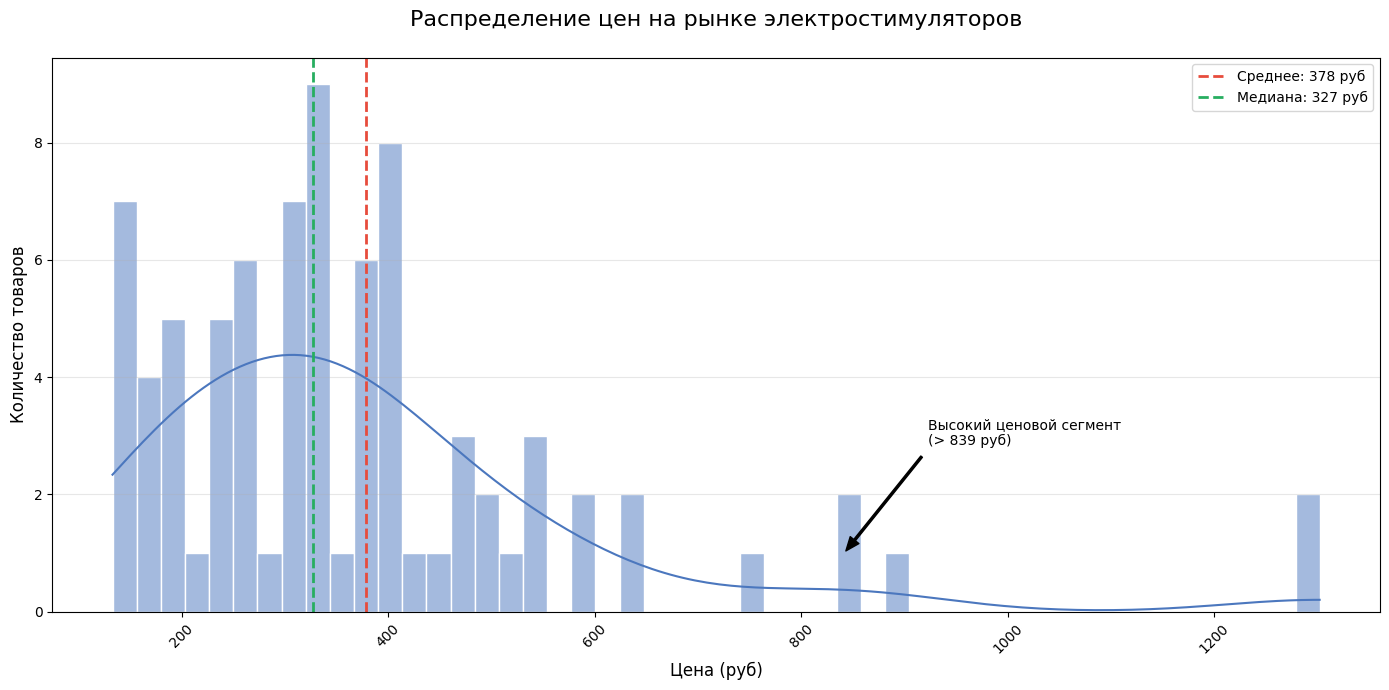

In [7]:
price_data = Goods["price"]

plt.figure(figsize=(14, 7))

ax = sns.histplot(price_data, bins=50, kde=True, 
                 color='#4B77BE', edgecolor='white')

mean_price = price_data.mean()
median_price = price_data.median()

plt.axvline(mean_price, color="#E74C3C", linestyle='--', 
           linewidth=2, label=f'–°—Ä–µ–¥–Ω–µ–µ: {mean_price:,.0f} —Ä—É–±')
plt.axvline(median_price, color='#27AE60', linestyle='--',
           linewidth=2, label=f'–ú–µ–¥–∏–∞–Ω–∞: {median_price:,.0f} —Ä—É–±')

q95 = price_data.quantile(0.95)
outliers = price_data[price_data > q95]

y_max = ax.get_ylim()[1]
if len(outliers) > 0:
    plt.annotate(f'–í—ã—Å–æ–∫–∏–π —Ü–µ–Ω–æ–≤–æ–π —Å–µ–≥–º–µ–Ω—Ç\n(> {q95:,.0f} —Ä—É–±)',
                xy=(q95, y_max * 0.1),           
                xytext=(q95 * 1.1, y_max * 0.3), 
                arrowprops=dict(facecolor='black', 
                              shrink=0.05,
                              width=1.5,         
                              headwidth=8,       
                              headlength=10), 
                fontsize=10,
                ha='left')

plt.title('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Ü–µ–Ω –Ω–∞ —Ä—ã–Ω–∫–µ —ç–ª–µ–∫—Ç—Ä–æ—Å—Ç–∏–º—É–ª—è—Ç–æ—Ä–æ–≤\n', fontsize=16)
plt.xlabel('–¶–µ–Ω–∞ (—Ä—É–±)', fontsize=12)
plt.ylabel('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —Ç–æ–≤–∞—Ä–æ–≤', fontsize=12)
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.ticklabel_format(style='plain', axis='x')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [8]:
from sklearn.cluster import KMeans

price_segment_clear_df = Goods.copy()

prices = price_segment_clear_df["price"].values.reshape(-1, 1)
kmeans = KMeans(n_clusters=4, random_state=42).fit(prices)
price_segment_clear_df['price_segment'] = kmeans.labels_

def min_max(price_segment, df):
    return int(df[df["price_segment"] == price_segment]["price"].min()), int(df[df["price_segment"] == price_segment]["price"].max())

min_max_segments = {}
for i in range(4):
    min_max_segments[i] = min_max(i, price_segment_clear_df)

min_max_segments = sorted(min_max_segments.items(), key=lambda item: item[1] )

print(f"–ù–∏–∑–∫–∏–π —Ü–µ–Ω–æ–≤–æ–π —Å–µ–≥–º–µ–Ω—Ç: {min_max_segments[0][1]}")
print(f"–°—Ä–µ–¥–Ω–∏–π —Ü–µ–Ω–æ–≤–æ–π —Å–µ–≥–º–µ–Ω—Ç: {min_max_segments[1][1]}")
print(f"–°—Ä–µ–¥–Ω–µ-–≤—ã—Å–æ–∫–∏–π —Ü–µ–Ω–æ–≤–æ–π —Å–µ–≥–º–µ–Ω—Ç:{min_max_segments[2][1]}")
print(f"–í—ã—Å–æ–∫–∏–π —Ü–µ–Ω–æ–≤–æ–π —Å–µ–≥–º–µ–Ω—Ç:  {min_max_segments[3][1]}")

–ù–∏–∑–∫–∏–π —Ü–µ–Ω–æ–≤–æ–π —Å–µ–≥–º–µ–Ω—Ç: (133, 274)
–°—Ä–µ–¥–Ω–∏–π —Ü–µ–Ω–æ–≤–æ–π —Å–µ–≥–º–µ–Ω—Ç: (305, 513)
–°—Ä–µ–¥–Ω–µ-–≤—ã—Å–æ–∫–∏–π —Ü–µ–Ω–æ–≤–æ–π —Å–µ–≥–º–µ–Ω—Ç:(532, 885)
–í—ã—Å–æ–∫–∏–π —Ü–µ–Ω–æ–≤–æ–π —Å–µ–≥–º–µ–Ω—Ç:  (1302, 1302)


In [9]:
import pandas as pd
pd.set_option('display.max_colwidth', None)

def top_specs(df, column, top_n, stats):
    zones = df[column].str.split('[;,/]', expand=True).stack().str.strip()
    top_zones = zones.value_counts().head(top_n)
    stats.update({
        f'—Ç–æ–ø {top_n} {column}': '; '.join([f"{zone} ({count})" for (zone, count) in top_zones.items()])
    })

def get_segment_stats(segment_df, segment_name, top_n):
    stats = {
        '–°–µ–≥–º–µ–Ω—Ç': segment_name,
        '–ö–æ–ª-–≤–æ —Ç–æ–≤–∞—Ä–æ–≤': len(segment_df),
        '–î–æ–ª—è —Ç–æ–≤–∞—Ä–æ–≤ –±–µ–∑ –±—Ä–µ–Ω–¥–∞': len(segment_df[segment_df['brand'] == 'unknown']) / len(segment_df),
        '–°—Ä–µ–¥–Ω–∏–π —Ä–µ–π—Ç–∏–Ω–≥': segment_df['rating'].median(),
        '–°—Ä–µ–¥–Ω–µ–µ –∫–æ–ª-–≤–æ –æ—Ç–∑—ã–≤–æ–≤': segment_df['feedbacks'].median()
    }
    
    # –¢–æ–ø –±—Ä–µ–Ω–¥–æ–≤
    top_brands = segment_df['brand'].value_counts().head(top_n)
    stats.update({
        f'—Ç–æ–ø {top_n} –±—Ä–µ–Ω–¥–æ–≤': '; '.join([f"{brand} ({count})" for (brand, count) in top_brands.items()])
    })
    
    return stats

low_price_df = price_segment_clear_df[price_segment_clear_df["price_segment"] == min_max_segments[0][0]]
mid_price_df = price_segment_clear_df[price_segment_clear_df["price_segment"] == min_max_segments[1][0]]
mid_high_price_df = price_segment_clear_df[price_segment_clear_df["price_segment"] == min_max_segments[2][0]]
high_price_df = price_segment_clear_df[price_segment_clear_df["price_segment"] == min_max_segments[3][0]]

segments = {
    '–ù–∏–∑–∫–∏–π': low_price_df,
    '–°—Ä–µ–¥–Ω–∏–π': mid_price_df,
    '–°—Ä–µ–¥–Ω–µ-–≤—ã—Å–æ–∫–∏–π': mid_high_price_df,
    '–í—ã—Å–æ–∫–∏–π': high_price_df
}

top_n = 5
all_stats = [get_segment_stats(df, name, top_n) for name, df in segments.items()]
result_df = pd.DataFrame(all_stats)

display(result_df)
pd.reset_option('display.max_colwidth')

–°–µ–≥–º–µ–Ω—Ç  –ö–æ–ª-–≤–æ —Ç–æ–≤–∞—Ä–æ–≤  –î–æ–ª—è —Ç–æ–≤–∞—Ä–æ–≤ –±–µ–∑ –±—Ä–µ–Ω–¥–∞  –°—Ä–µ–¥–Ω–∏–π —Ä–µ–π—Ç–∏–Ω–≥  \
0          –ù–∏–∑–∫–∏–π              29                 0.000000              5.0   
1         –°—Ä–µ–¥–Ω–∏–π              39                 0.025641              4.8   
2  –°—Ä–µ–¥–Ω–µ-–≤—ã—Å–æ–∫–∏–π              11                 0.454545              4.5   
3         –í—ã—Å–æ–∫–∏–π               2                 1.000000              0.0   

   –°—Ä–µ–¥–Ω–µ–µ –∫–æ–ª-–≤–æ –æ—Ç–∑—ã–≤–æ–≤  \
0                     3.0   
1                    53.0   
2                     4.0   
3                     0.0   

                                                                                    —Ç–æ–ø 5 –±—Ä–µ–Ω–¥–æ–≤  
0  –º–∞—Å—Å–∞–∂–µ—Ä—ã (19); –º–∏–æ—Å—Ç–∏–º—É–ª—è—Ç–æ—Ä—ã (6); ashop (2); –º–∞—Å—Å–∞–∂–µ—Ä—ã –¥–ª—è –≥–æ–ª–æ–≤—ã –∏ –ª–∏—Ü–∞ (1); helendanny (1)  
1               –º–∏–æ—Å—Ç–∏–º—É–ª—è—Ç–æ—Ä—ã (13); –º–∞—Å—Å–∞–∂–µ—Ä—ã (13); –º–∏–æ—Å—Ç–∏–º—É–ª—è—Ç–æ—Ä (4); ashop (4); the basket (3)  
2                  unknown (5); the basket (1); –º–∏–æ—Å—Ç–∏–º—É–ª—è—Ç–æ—Ä (1); beurer (1); –º–∏–æ—Å—Ç–∏–º—É–ª—è—Ç–æ—Ä—ã (1)  
3                                                                                     unknown (2)

In [41]:
Goods_main_spec = pd.merge(
    Goods, 
    main_specs,
    how='left',
    left_on=['id', 'marketplace'],
    right_on=['good_id', 'marketplace']
)

electrod_1 = Goods_main_spec[Goods_main_spec['–∫–æ–º–ø–ª–µ–∫—Ç–∞—Ü–∏—è'] == '1']['price'].describe()
electrod_2 = Goods_main_spec[Goods_main_spec['–∫–æ–º–ø–ª–µ–∫—Ç–∞—Ü–∏—è'] == '2']['price'].describe()
electrod_4 = Goods_main_spec[Goods_main_spec['–∫–æ–º–ø–ª–µ–∫—Ç–∞—Ü–∏—è'] == '4']['price'].describe()

summary_df = pd.DataFrame({
    '–ö–æ–º–ø–ª–µ–∫—Ç–∞—Ü–∏—è 1': electrod_1,
    '–ö–æ–º–ø–ª–µ–∫—Ç–∞—Ü–∏—è 2': electrod_2,
    '–ö–æ–º–ø–ª–µ–∫—Ç–∞—Ü–∏—è 4': electrod_4
})

print("üìà –°–í–û–î–ù–ê–Ø –°–¢–ê–¢–ò–°–¢–ò–ö–ê –¶–ï–ù –ø–æ —ç–ª–µ–∫—Ç—Ä–æ–¥–∞–º")
print("=" * 65)
print(summary_df.round(2))

üìà –°–í–û–î–ù–ê–Ø –°–¢–ê–¢–ò–°–¢–ò–ö–ê –¶–ï–ù –ø–æ —ç–ª–µ–∫—Ç—Ä–æ–¥–∞–º
       –ö–æ–º–ø–ª–µ–∫—Ç–∞—Ü–∏—è 1  –ö–æ–º–ø–ª–µ–∫—Ç–∞—Ü–∏—è 2  –ö–æ–º–ø–ª–µ–∫—Ç–∞—Ü–∏—è 4
count           34.00            5.00            4.00
mean           304.00          347.80          437.00
std            158.32          122.34          184.53
min            133.00          197.00          195.00
25%            183.75          319.00          342.00
50%            258.00          323.00          485.50
75%            382.00          364.00          580.50
max            885.00          536.00          582.00


## 1. –û —Ä—ã–Ω–∫–µ

**–†—ã–Ω–æ–∫ –∫–æ–º–ø–∞–∫—Ç–Ω—ã–π:**
- –í—Å–µ–≥–æ 81 —Ç–æ–≤–∞—Ä –≤ –∞–Ω–∞–ª–∏–∑–µ
- –¶–µ–Ω—ã –∫–æ–ª–µ–±–ª—é—Ç—Å—è –æ—Ç 133 –¥–æ 1 302 —Ä—É–±
- –†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –±–ª–∏–∑–∫–æ –∫ –Ω–æ—Ä–º–∞–ª—å–Ω–æ–º—É: —Å—Ä–µ–¥–Ω—è—è —Ü–µ–Ω–∞ (378 —Ä—É–±) –Ω–µ–Ω–∞–º–Ω–æ–≥–æ –ø—Ä–µ–≤—ã—à–∞–µ—Ç –º–µ–¥–∏–∞–Ω—É (327 —Ä—É–±)
- –£–º–µ—Ä–µ–Ω–Ω–∞—è –≤–æ–ª–∞—Ç–∏–ª—å–Ω–æ—Å—Ç—å: —Å—Ç–∞–Ω–¥–∞—Ä—Ç–Ω–æ–µ –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏–µ 221 —Ä—É–±

–ù–∞ —Å–∞–º–æ–º –¥–µ–ª–µ —Ä—ã–Ω–æ–∫ —Å–æ—Å—Ç–æ–∏—Ç –≤ –º–∞—Å—Å–µ —Å–≤–æ–µ–π –∏–∑ –ø—Ä–æ—Å—Ç–µ–π—à–µ–≥–æ —à–Ω—É—Ä–∞ —Å –∫–æ–Ω–Ω–µ–∫—Ç–æ—Ä–æ–º –¥–ª—è –º–∏–æ—Å—Ç–∏–º—É–ª—è—Ç–æ—Ä–∞ –∏ –∫–æ–Ω–Ω–µ–∫—Ç–æ—Ä–æ–º/–∫–æ–Ω–Ω–µ–∫—Ç–æ—Ä–∞–º–∏ –¥–ª—è —ç–ª–µ–∫—Ç—Ä–æ–¥–æ–≤. –û—Å–Ω–æ–≤–Ω–æ–µ —Ä–∞–∑–ª–∏—á–∏–µ - –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∫–æ–Ω–Ω–µ–∫—Ç–æ—Ä–æ–≤ –∫ —ç–ª–µ–∫—Ç—Ä–æ–¥–∞–º. 

–ë–æ–ª—å—à–∞—è —á–∞—Å—Ç—å —ç—Ç–∏—Ö —à–Ω—É—Ä–æ–≤ –∏–º–µ–µ—Ç —Ü–µ–Ω—É < 600 —Ä—É–±–ª–µ–π. –ù–∞ —Å–∞–º–æ–º –¥–µ–ª–µ –∑–¥–µ—Å—å –¥–∞–∂–µ —Å–ª–æ–∂–Ω–æ –≤—ã–¥–µ–ª–∏—Ç—å —Ü–µ–Ω–æ–≤—ã–µ —Å–µ–≥–º–µ–Ω—Ç—ã –≤ —Å–≤—è–∑–∏ —Å –æ–¥–Ω–æ–æ–±—Ä–∞–∑–Ω–æ—Å—Ç—å—é –ø—Ä–µ–¥—Å—Ç–∞–≤–ª–µ–Ω–Ω—ã—Ö –º–æ–¥–µ–ª–µ–π. 

–í –æ—Å–Ω–æ–≤–Ω–æ–º —Ä—ã–Ω–æ–∫ –ø—Ä–µ–¥—Å—Ç–∞–≤–ª–µ–Ω –º–æ–¥–µ–ª—è–º–∏ —Å –∫–æ–Ω–µ–∫—Ç–æ—Ä–∞–º–∏ –Ω–∞ 1, 2 –∏–ª–∏ 4 —ç–ª–µ–∫—Ç—Ä–æ–¥–∞ —Å–æ —Å—Ä–µ–¥–Ω–µ–π —Ü–µ–Ω–æ–π ~304, 347 –∏ 437 —Ä—É–±. —Å–æ–æ—Ç–≤–µ—Å—Ç–≤–µ–Ω–Ω–æ.

/var/folders/x5/m9f65fq57_1642g0ls7c0zxw0000gn/T/ipykernel_2236/1095736399.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


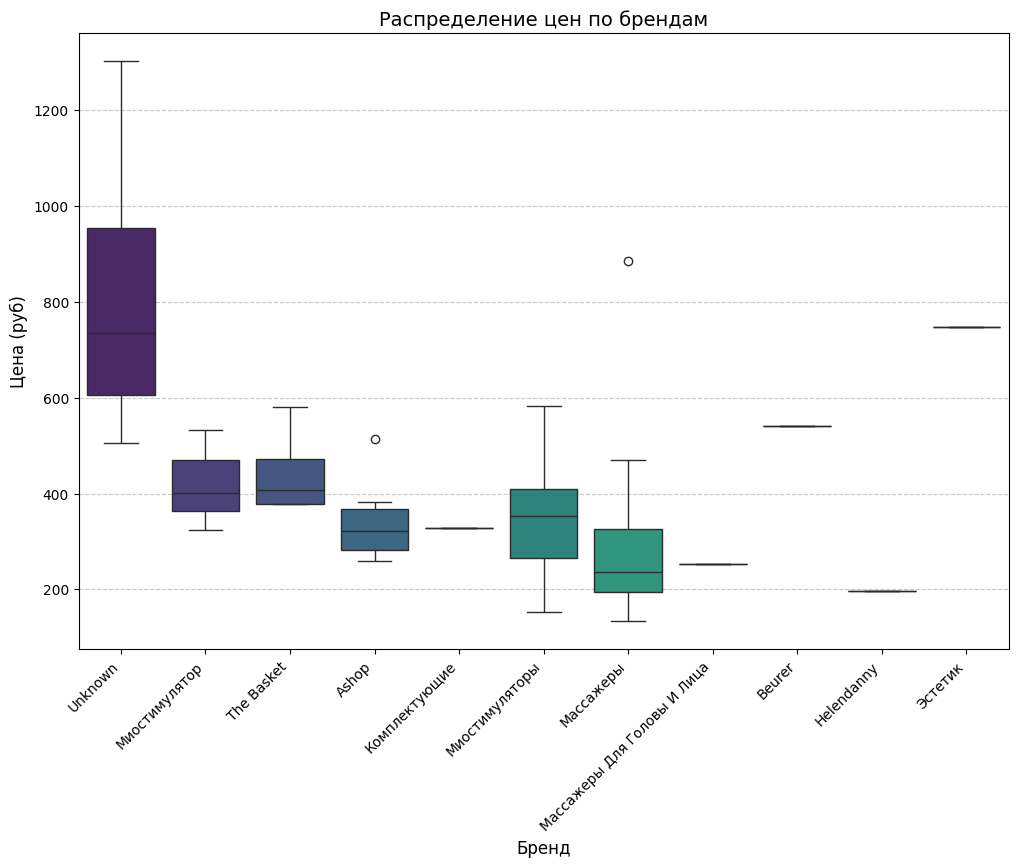

In [42]:
clear_df = Goods.copy()

boxplot_df = clear_df.dropna(subset=["brand"])
boxplot_df['brand'] = boxplot_df['brand'].str.strip().str.title()

top_brands = boxplot_df['brand'].value_counts().head(20).index  # –¢–æ–ø-20 –±—Ä–µ–Ω–¥–æ–≤
df_filtered = boxplot_df[boxplot_df['brand'].isin(top_brands)]

plt.figure(figsize=(12, 8))
sns.boxplot(
    data=df_filtered,
    x='brand',
    y='price',
    palette='viridis'
)
plt.title('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Ü–µ–Ω –ø–æ –±—Ä–µ–Ω–¥–∞–º', fontsize=14)
plt.xlabel('–ë—Ä–µ–Ω–¥', fontsize=12)
plt.ylabel('–¶–µ–Ω–∞ (—Ä—É–±)', fontsize=12)
plt.xticks(rotation=45, ha='right')  # –ü–æ–≤–æ—Ä–æ—Ç –ø–æ–¥–ø–∏—Å–µ–π
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [43]:
Goods['brand'].value_counts().head(20)

brand
–º–∞—Å—Å–∞–∂–µ—Ä—ã                      33
–º–∏–æ—Å—Ç–∏–º—É–ª—è—Ç–æ—Ä—ã                 20
unknown                         8
ashop                           6
–º–∏–æ—Å—Ç–∏–º—É–ª—è—Ç–æ—Ä                   5
the basket                      4
–∫–æ–º–ø–ª–µ–∫—Ç—É—é—â–∏–µ                   1
–º–∞—Å—Å–∞–∂–µ—Ä—ã –¥–ª—è –≥–æ–ª–æ–≤—ã –∏ –ª–∏—Ü–∞     1
beurer                          1
helendanny                      1
—ç—Å—Ç–µ—Ç–∏–∫                         1
Name: count, dtype: int64

–í –æ—Å–Ω–æ–≤–Ω–æ–º —Ç–æ–≤–∞—Ä—ã –ø—Ä–µ–¥—Å—Ç–∞–≤–ª–µ–Ω—ã –Ω–µ–∏–∑–≤–µ—Å—Ç–Ω—ã–º–∏ –±—Ä–µ–Ω–¥–∞–º–∏.

## –†–µ–∞–∫—Ü–∏—è –ø–æ—Ç—Ä–µ–±–∏—Ç–µ–ª–µ–π (–ê–Ω–∞–ª–∏–∑ –æ—Ç–∑—ã–≤–æ–≤ –∏ —Ä–µ–π—Ç–∏–Ω–≥–æ–≤)

–ß—Ç–æ –∫–∞—Å–∞–µ—Ç—Å—è —Å–∞–º—ã—Ö –ø–æ–ø—É–ª—è—Ä–Ω—ã—Ö —Ö–∞—Ä–∞–∫—Ç–µ—Ä—Å—Ç–∏–∫:

In [44]:
def plot_top_main_specs(df, column, top_n, color):
    spec_df = df[column].str.split('[;,/]', expand=True).stack().str.strip()

    figsize = (15, 3)

    plt.figure(figsize=figsize)
    spec_df.value_counts().head(top_n).plot(kind='bar', color=color)
    plt.title(f'–¢–æ–ø-{top_n} {column}')
    plt.ylabel('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —Ç–æ–≤–∞—Ä–æ–≤')
    plt.xticks(rotation=30)
    plt.grid(axis='y', alpha=0.3)
    plt.show()

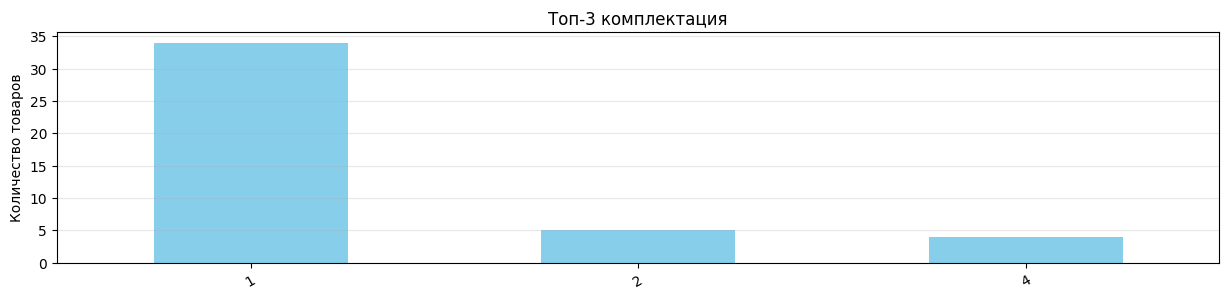

In [45]:
plot_top_main_specs(main_specs, '–∫–æ–º–ø–ª–µ–∫—Ç–∞—Ü–∏—è', 3, 'skyblue')

–û—Å–Ω–æ–≤–Ω—É—é —á–∞—Å—Ç—å —Ä—ã–Ω–∫–∞ —Å–æ—Ç—Å–∞–≤–ª—è—é—Ç –∫–∞–±–µ–ª–∏ –Ω–∞ 1, 2 –∏ 4 —ç–ª–µ—Ç–∫—Ä–æ–¥–∞.

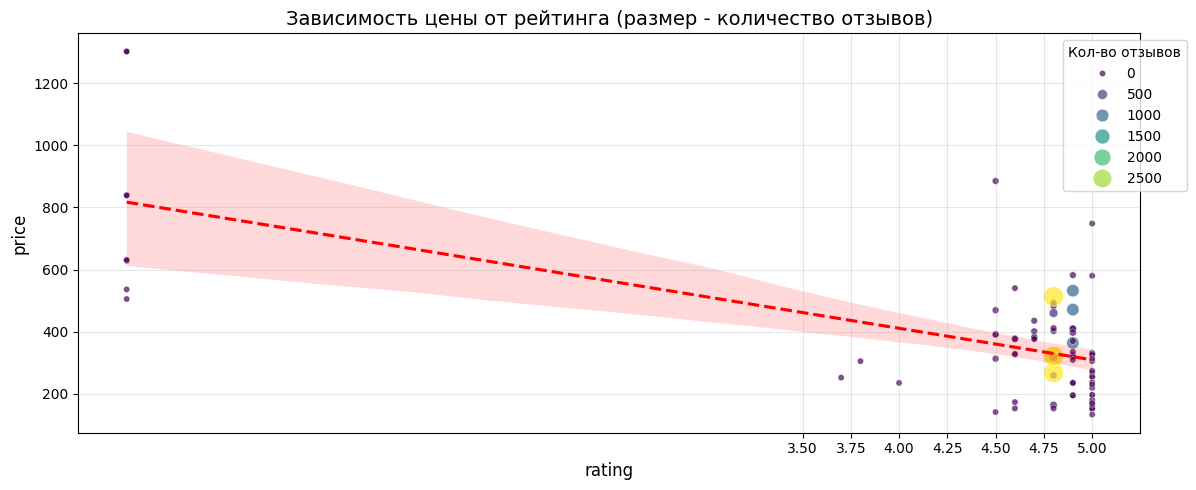

In [46]:
plt.figure(figsize=(12, 5))
sns.scatterplot(data=Goods, x='rating', y='price', 
                hue='feedbacks', size='feedbacks',
                sizes=(20, 200), alpha=0.7, palette='viridis')

plt.title('–ó–∞–≤–∏—Å–∏–º–æ—Å—Ç—å —Ü–µ–Ω—ã –æ—Ç —Ä–µ–π—Ç–∏–Ω–≥–∞ (—Ä–∞–∑–º–µ—Ä - –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –æ—Ç–∑—ã–≤–æ–≤)', fontsize=14)
plt.xlabel('–†–µ–π—Ç–∏–Ω–≥', fontsize=12)
plt.ylabel('–¶–µ–Ω–∞ (—Ä—É–±)', fontsize=12)
plt.xticks(np.arange(3.5, 5.1, 0.25))
plt.grid(alpha=0.3)
plt.ticklabel_format(style='plain', axis='y')

# –î–æ–±–∞–≤–ª—è–µ–º –ª–∏–Ω–∏—é —Ç—Ä–µ–Ω–¥–∞
sns.regplot(data=Goods, x='rating', y='price', 
           scatter=False, color='red', line_kws={'linestyle':'--'})

plt.legend(title='–ö–æ–ª-–≤–æ –æ—Ç–∑—ã–≤–æ–≤', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

–ú—ã –≤–∏–¥–∏–º —É—Å—Ç–æ–π—á–∏–≤—É—é –æ–±—Ä–∞—Ç–Ω—É—é –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç—å —Ä–µ–π—Ç–∏–Ω–≥–∞ –æ—Ç —Ü–µ–Ω—ã.

/var/folders/x5/m9f65fq57_1642g0ls7c0zxw0000gn/T/ipykernel_2236/1583506022.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  box_plot = sns.boxplot(data=clear_df, x='rating_group', y='price',


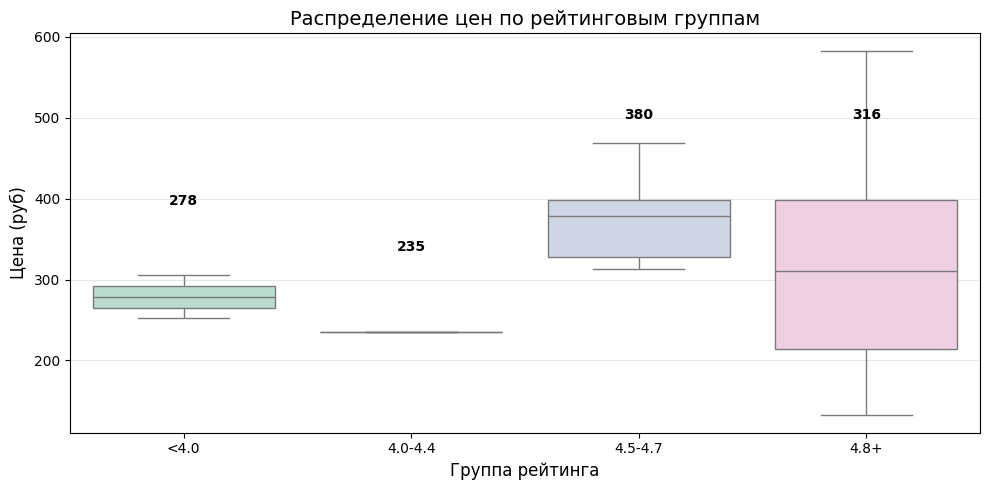

–°—Ä–µ–¥–Ω–∏–µ —Ü–µ–Ω—ã –ø–æ –≥—Ä—É–ø–ø–∞–º:
rating_group
<4.0       278.500000
4.0-4.4    235.000000
4.5-4.7    380.000000
4.8+       315.692308
Name: price, dtype: float64


In [ ]:
plt.figure(figsize=(10, 5))

clear_df = Goods.copy()

clear_df['rating_group'] = pd.cut(clear_df['rating'], 
                                   bins=[0, 3.9, 4.4, 4.7, 5],
                                   labels=['<4.0', '4.0-4.4', '4.5-4.7', '4.8+'])

box_plot = sns.boxplot(data=clear_df, x='rating_group', y='price', 
                      palette='Pastel2', showfliers=False)

plt.title('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Ü–µ–Ω –ø–æ —Ä–µ–π—Ç–∏–Ω–≥–æ–≤—ã–º –≥—Ä—É–ø–ø–∞–º', fontsize=14)
plt.xlabel('–ì—Ä—É–ø–ø–∞ —Ä–µ–π—Ç–∏–Ω–≥–∞', fontsize=12)
plt.ylabel('–¶–µ–Ω–∞ (—Ä—É–±)', fontsize=12)
plt.grid(axis='y', alpha=0.3)

means = clear_df.groupby('rating_group', observed=False)['price'].mean()

for i, (group, mean) in enumerate(means.items()):
    median_val = clear_df[clear_df['rating_group'] == group]['price'].median()
    y_pos = clear_df[clear_df['rating_group'] == group]['price'].quantile(0.75) + 100
    
    plt.text(i, y_pos, f'{mean:,.0f}', 
            ha='center', fontweight='bold', fontsize=10)

plt.tight_layout()
plt.show()

print("–°—Ä–µ–¥–Ω–∏–µ —Ü–µ–Ω—ã –ø–æ –≥—Ä—É–ø–ø–∞–º:")
print(means)

–í—ã—Å–æ–∫–∏–º —Ä–µ–π—Ç–∏–Ω–≥–æ–º –æ–±–ª–∞–¥–∞—é—Ç —Ç–æ–≤–∞—Ä—ã —Å—Ä–µ–¥–Ω–µ–≥–æ —Ü–µ–Ω–æ–≤–æ–≥–æ —Å–µ–≥–º–µ–Ω—Ç–∞.

#### –ê–Ω–∞–ª–∏–∑ —Ç–µ–∫—Å—Ç–æ–≤

In [57]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer

nltk.download('stopwords')

df = Feedbacks

def clean_text(text):
    if pd.isna(text): 
        return ""
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    stop_words = set(stopwords.words('russian'))
    stemmer = SnowballStemmer('russian')
    words = text.split()
    words = [stemmer.stem(word) for word in words if word not in stop_words and len(word) > 2]
    return " ".join(words)

def generate_wordcloud(text, title):
    wordcloud = WordCloud(
        width=800, 
        height=400,
        background_color='white',
        max_words=50
    ).generate(text)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.title(title)
    plt.show()
df['text_clean'] = df['text'].apply(clean_text)

positive = df[df['rating'] > 3]
negative = df[df['rating'] <= 3]

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/nekitmilk/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


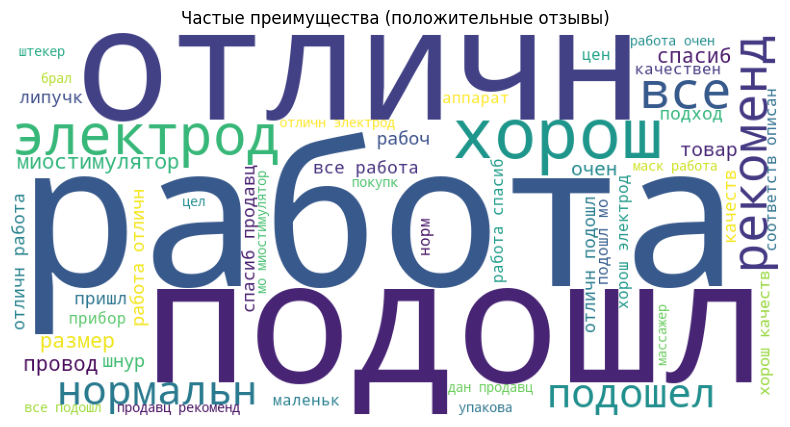

In [58]:
all_positive = " ".join(positive['text_clean'])
generate_wordcloud(all_positive, '–ß–∞—Å—Ç—ã–µ –ø—Ä–µ–∏–º—É—â–µ—Å—Ç–≤–∞ (–ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω—ã–µ –æ—Ç–∑—ã–≤—ã)')

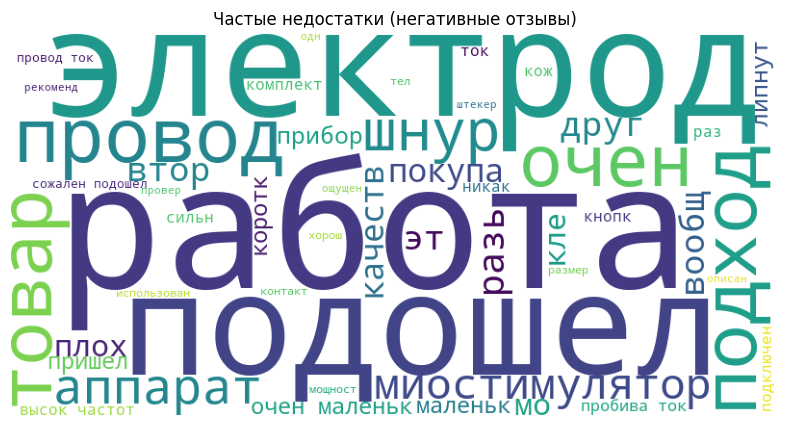

In [59]:
all_negative = " ".join(negative['text_clean'])
generate_wordcloud(all_negative, '–ß–∞—Å—Ç—ã–µ –Ω–µ–¥–æ—Å—Ç–∞—Ç–∫–∏ (–Ω–µ–≥–∞—Ç–∏–≤–Ω—ã–µ –æ—Ç–∑—ã–≤—ã)')

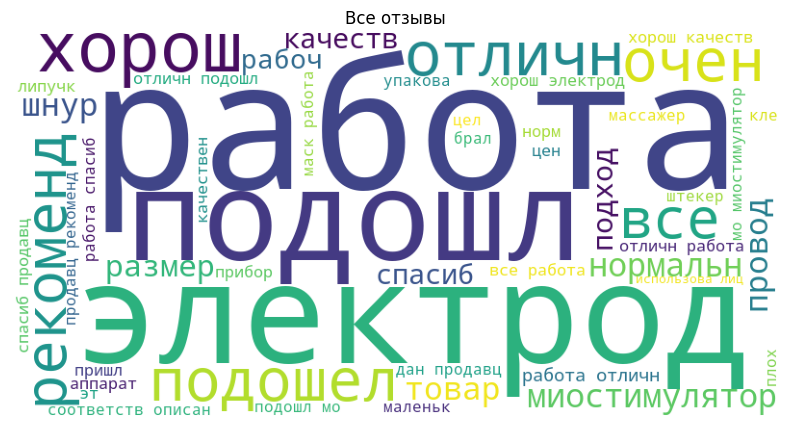

In [60]:
all_feedbacks = " ".join(df['text_clean'])
generate_wordcloud(all_feedbacks, '–í—Å–µ –æ—Ç–∑—ã–≤—ã')

In [61]:
def get_tfidf_top_features(texts, n=10, use_idf=False, use_mean=True):
    tfidf = TfidfVectorizer(max_features=100, ngram_range=(1, 2))

    tfidf_matrix = tfidf.fit_transform(texts)
    feature_names = tfidf.get_feature_names_out()
    
    if use_idf:
        sorted_indices = tfidf.idf_.argsort()
        return feature_names[sorted_indices][:n].tolist()
    
    if use_mean:
        aggregated = tfidf_matrix.mean(axis=0).A1
    else:
        aggregated = tfidf_matrix.sum(axis=0).A1
    
    sorted_indices = aggregated.argsort()[::-1]  # –°–æ—Ä—Ç–∏—Ä–æ–≤–∫–∞ –ø–æ —É–±—ã–≤–∞–Ω–∏—é
    return feature_names[sorted_indices][:n].tolist()

In [62]:
top_positive_adv = get_tfidf_top_features(positive['text_clean'])
top_negative_dis = get_tfidf_top_features(negative['text_clean'], n=20)
print("–¢–æ–ø-10 —Å–ª–æ–≤ (–ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω—ã–µ –æ—Ç–∑—ã–≤—ã, –ø—Ä–µ–∏–º—É—â–µ—Å—Ç–≤–∞):", top_positive_adv)
print("–¢–æ–ø-20 —Å–ª–æ–≤ (–Ω–µ–≥–∞—Ç–∏–≤–Ω—ã–µ –æ—Ç–∑—ã–≤—ã, –Ω–µ–¥–æ—Å—Ç–∞—Ç–∫–∏):", top_negative_dis)

–¢–æ–ø-10 —Å–ª–æ–≤ (–ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω—ã–µ –æ—Ç–∑—ã–≤—ã, –ø—Ä–µ–∏–º—É—â–µ—Å—Ç–≤–∞): ['—Ä–∞–±–æ—Ç–∞', '–æ—Ç–ª–∏—á–Ω', '–ø–æ–¥–æ—à–ª', '—Ö–æ—Ä–æ—à', '–≤—Å–µ', '—ç–ª–µ–∫—Ç—Ä–æ–¥', '—Å–ø–∞—Å–∏–±', '–ø—Ä–æ–≤–æ–¥', '—Ç–æ–≤–∞—Ä', '—Ä–µ–∫–æ–º–µ–Ω–¥']
–¢–æ–ø-20 —Å–ª–æ–≤ (–Ω–µ–≥–∞—Ç–∏–≤–Ω—ã–µ –æ—Ç–∑—ã–≤—ã, –Ω–µ–¥–æ—Å—Ç–∞—Ç–∫–∏): ['—Ä–∞–±–æ—Ç–∞', '–ø–æ–¥–æ—à–µ–ª', '–ø—Ä–æ–≤–æ–¥', '–æ—á–µ–Ω', '—Ç–æ–≤–∞—Ä', '–ø–ª–æ—Ö', '—Ä–∞–∑–º–µ—Ä', '–ø–æ–¥—Ö–æ–¥', '—à–Ω—É—Ä', '—ç–ª–µ–∫—Ç—Ä–æ–¥', '–º–∞–ª–µ–Ω—å–∫', '—à—Ç–µ–∫–µ—Ä', '–ø—Ä–∏—à–µ–ª', '–∞–ø–ø–∞—Ä–∞—Ç', '–≤–æ–∑–≤—Ä–∞—Ç', '—Ç–æ–∫', '—Ç–æ–Ω–∫', '–º–∏–æ—Å—Ç–∏–º—É–ª—è—Ç–æ—Ä', '–Ω–∏–∫–∞–∫', '—Ç–∞–∫']


In [64]:
print(f"–î–æ–ª—è –ø–æ–∑–∏—Ç–∏–≤–Ω—ã—Ö –æ—Ç–∑—ã–≤–æ–≤ –æ—Ç –æ–±—â–µ–≥–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞: {(len(positive)*100/(len(positive) + len(negative))):.2f}%")

–î–æ–ª—è –ø–æ–∑–∏—Ç–∏–≤–Ω—ã—Ö –æ—Ç–∑—ã–≤–æ–≤ –æ—Ç –æ–±—â–µ–≥–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞: 92.53%


–ü–æ—Ç—Ä–µ–±–∏—Ç–µ–ª–∏ –≤ –æ—Å–Ω–æ–≤–Ω–æ–º –æ—Ü–µ–Ω–∏–≤–∞—é—Ç –¥–∞–Ω–Ω—ã–µ —É—Å—Ç—Ä–æ—Å—Ç–≤–∞ –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω–æ. 

–í –Ω–µ–≥–∞—Ç–∏–≤–Ω—ã—Ö –æ—Ç–∑—ã–≤–∞—Ö —Å–ª–æ–∂–Ω–æ –≤—ã–¥–µ–ª–∏—Ç—å –æ—Å–Ω–æ–≤–Ω—ã–µ –∂–∞–ª–æ–±—ã, –Ω–æ –º–æ–∂–Ω–æ –æ—Ç–º–µ—Ç–∏—Ç—å:
- –¥–ª–∏–Ω–Ω–∞ –ø—Ä–æ–≤–æ–¥–∞
- –ø—Ä–æ–≤–æ–¥ –Ω–µ –ø–æ–¥–æ—à–µ–ª
- —Ä–∞–±–æ—Ç–∞

## –í—ã–≤–æ–¥—ã:

–í –æ—Å–Ω–æ–≤–Ω–æ–π –º–∞—Å—Å–µ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–∏ –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω–æ –æ—Ü–µ–Ω–∏–≤–∞—é—Ç –¥–∞–Ω–Ω—ã–µ —Ç–æ–≤–∞—Ä—ã (> 90% –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω—ã—Ö –æ—Ç–∑—ã–≤–æ–≤).

–ò–¥–µ–∞–ª—å–Ω—ã–π –ø—Ä–æ–¥—É–∫—Ç –≤—ã–≥–ª—è–¥–∏—Ç —Ç–∞–∫: –∫–∞—á–µ—Å—Ç–≤–µ–Ω–Ω—ã–π –ø—Ä–æ–≤–æ–¥ —Å—Ä–µ–¥–Ω–µ–≥–æ —Ü–µ–Ω–æ–≤–æ–≥–æ —Å–µ–≥–º–µ–Ω—Ç–∞ –Ω–∞ –Ω–µ—Å–∫–æ–ª—å–∫–æ —ç–ª–µ–∫—Ç—Ä–æ–¥–æ–≤, –∫–æ—Ç–æ—Ä—ã–π –ø–æ–¥–æ–π–¥–µ—Ç –∫ –∞–ø–ø–∞—Ä–∞—Ç—É.

–û–ø—Ç–∏–º–∞–ª—å–Ω—ã–π —Å–µ–≥–º–µ–Ω—Ç –¥–ª—è –∑–∞–ø—É—Å–∫–∞ - —Å—Ä–µ–¥–Ω–∏–π/—Å—Ä–µ–¥–Ω–µ-–≤—ã—Å–æ–∫–∏–π, –ø–æ—Å–∫–æ–ª—å–∫—É –¥—Ä—É–≥–∏–µ —Ü–µ–Ω–æ–≤—ã–µ —Å–µ–≥–º–µ–Ω—Ç—ã –Ω–µ –∏–º–µ—é—Ç –ø–æ–ø—É–ª—è—Ä–Ω–æ—Å—Ç–∏.

–ù–µ –∏–¥–µ–∞–ª—å–Ω—ã–π - –Ω–∏–∑–∫–∏–π –∏ –≤—ã—Å–æ–∫–∏–π, –ø–æ—Å–∫–æ–ª—å–∫—É –æ–Ω–∏ –Ω–µ –ø–æ–ª—å–∑—É—é—Ç—Å—è –ø–æ–ø—É–ª—è—Ä–Ω–æ—Å—Ç—å—é —É –ø–æ—Ç—Ä–µ–±–∏—Ç–µ–ª—è.

–ö–æ–Ω–∫—É—Ä–µ–Ω—Ü–∏—è –Ω–∞ —Ä—ã–Ω–∫–µ –Ω–∏–∑–∫–∞—è, –ø–æ—Å–∫–æ–ª—å–∫—É –Ω–∞ 2-—Ö –∫—Ä—É–ø–Ω–µ—à–∏—Ö –º–∞—Ä–∫–µ—Ç–ø–ª–µ–π—Å–∞—Ö (Ozon –∏ Wildberries) –ø—Ä–µ–¥—Å—Ç–∞–≤–ª–µ–Ω–æ < 100 —Ç–æ–≤–∞—Ä–æ–≤. 